In [1]:
import os
import csv
import sys
import glob
import logging
import datetime

import pandas as pd
import numpy as np
import phonenumbers

In [2]:
files = [file for file in glob.glob('*.csv')]
print(files)

['NYL_FieldAgent_20210129.csv', 'NYL_FieldAgent_20210212.csv', 'NYL_FieldAgent_20210205.csv', 'NYL_FieldAgent_20210219.csv']


In [3]:
first_file = files[0]
first_file

'NYL_FieldAgent_20210129.csv'

In [4]:
stem = os.path.splitext(first_file)[0]

In [5]:
date_time_str = stem.split('_')[-1]
date_time_str

'20210129'

In [6]:
## Sort by date order
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%d')

print('Date:', date_time_obj.date())
print('Date-time:', date_time_obj)

Date: 2021-01-29
Date-time: 2021-01-29 00:00:00


In [7]:
## Check line count
for file in files:
    df = pd.read_csv(file)
    print(len(df.index))
    

2091
2100
2102
2106


In [8]:
files[-1]

'NYL_FieldAgent_20210219.csv'

In [9]:
files[-2]

'NYL_FieldAgent_20210205.csv'

In [10]:
df = pd.read_csv(files[0])
df.head()

,Partner,Agent Id,Update Date,Agency Name,Agency Phone Number,Agency Street Address,Agency Street Address 2,Agency City,Agency State,Agency Postal Code,...,Agent Postal Code,Agent Phone Number,Agent Email Address,Agent National Producer Number,Agent Writing Contract Start Date,Agent Writing Contract Status,Agent License State (active),Date when an agent became A2O,Title,AARP Auth to Offer Level
0,NYL,866,01/28/2021,NORTHERN CALIFORNIA GO,916.774.6200,2999 DOUGLAS BLVD.,SUITE 350 ...,ROSEVILLE,CA,956613839,...,956613839,916.774.6236,stevemorgan@ft.NewYorkLife.com,2065325,06/10/1998,Active,"CA,FL,",12/02/2020,AGENT,2
1,NYL,1049,01/28/2021,EL PASO GO,915.534.3200,MILLS BUILDING,303 N. OREGON STREET SUITE 1100 ...,EL PASO,TX,79901,...,799011261,915.534.3216,abenitez@ft.NewYorkLife.com,1576906,06/02/1998,Active,"NM,TX,KY,VA,CA,AZ,",10/07/2020,AGENT,2
2,NYL,1257,01/28/2021,WYOMING GO,307.266.1485,111 WEST SECOND STREET,3RD FLOOR ...,CASPER,WY,826012464,...,826012224,307.265.5173,dchristense9@ft.NewYorkLife.com,2441827,09/14/1998,Active,"AZ,CO,MT,ND,OK,TX,WA,WY,NC,SD,UT,MO,PA,",12/29/2020,AGENT,2
3,NYL,1725,01/28/2021,BROOMFIELD Sales Office,303.403.5600,3200 CHERRY CREEK SO. DRIVE,SUITE 700 ...,DENVER,CO,802093245,...,800218015,303.941.8607,jkramer@ft.newyorklife.com,1928521,07/14/1998,Active,"CO,NV,WA,",10/02/2020,AGENT,2
4,NYL,1917,01/28/2021,MISSISSIPPI GO,601.607.1600,1052 HIGHLAND COLONY PARKWAY,SUITE 101 ...,RIDGELAND,MS,39157,...,390479031,601.992.6400,prwhitehead@ft.NewYorkLife.com,5826210,06/04/1994,Active,"AL,FL,GA,LA,MS,OK,TN,TX,VA,",12/02/2020,AGENT,2


10. Create another dataframe with which groups all the agents by Agency State. Display in the data frame. (optional, pandas related visualization and histograms)

    11. Create a dataframe which gives the Agent Name, Agent Writing ContractStart Date, Date when an agent became A2O.

In [44]:
def groupby_state(df, col):
    try:
        new_df = pd.DataFrame({'count' : df.groupby([col]).size()}).reset_index()
        return new_df
    except:
        pass

df_2 = groupby_state(df, "Agency State")

In [ ]:
df_2.plot.bar(x='Agency State', y='count')

In [52]:
top_ten = df_2.sort_values(by='count', axis=0, ascending=False, inplace=False)[:10]
print(top_ten)

   Agency State  count
32           NY    309
4            CA    301
40           TX    182
7            FL    147
36           PA     90
29           NJ     87
42           VA     73
17           MA     70
33           OH     57
12           IL     56


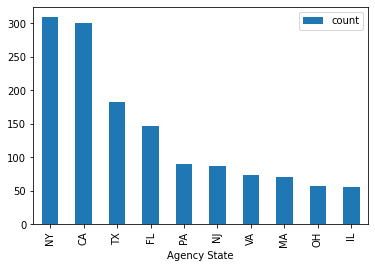

In [54]:
ax = top_ten.plot.bar(x='Agency State', y='count')
ax.figure.savefig('top_ten_states_by_agents.jpg')

In [43]:
df_3 = df[["Agent Last Name","Agent Middle Name","Agent First Name", "Agent Writing Contract Start Date", "Date when an agent became A2O"]]
df_3.head()

,Agent Last Name,Agent Middle Name,Agent First Name,Agent Writing Contract Start Date,Date when an agent became A2O
0,MORGAN,,STEVE,06/10/1998,12/02/2020
1,BENITEZ,,ANTHONY,06/02/1998,10/07/2020
2,CHRISTENSEN,,DAN,09/14/1998,12/29/2020
3,KRAMER,,JAMES,07/14/1998,10/02/2020
4,WHITEHEAD,R,PHILLIP,06/04/1994,12/02/2020


In [15]:
for index, row in df.iterrows():
    phone_one = row['Agency Phone Number']
    phone_two = row['Agent Phone Number']
    
    phone_one_obj = phonenumbers.parse('123', 'US')
    print(phone_one_obj)
    
    if phonenumbers.is_valid_number(phone_one_obj):
        pass
    else:
        print('Not a valid number')    

    break
## Check phone numbers
# x = phonenumbers.parse(number, "US")

Country Code: 1 National Number: 123
Not a valid number


In [32]:
from email_validator import validate_email, EmailNotValidError

email = 'jkramer@ft.newyorklife.com'

try:
  # Validate.
  valid = validate_email(email)

  # Update with the normalized form.
#   email = valid.email
  print(valid)
except EmailNotValidError as e:
  # email is not valid, exception message is human-readable
  print(str(e))

<ValidatedEmail jkramer@ft.newyorklife.com>


In [31]:
import re

email = 'me@tyshaikh.com'
email = 'jkramer@ft.newyorklife.com'
is_valid_email = bool(re.search(r"^[\w\.\+\-]+\@[\w]+\.[a-z]{2,3}$", email))

if not is_valid_email:
    print('not valid email')

not valid email


In [11]:
## Fix col names
for file in files:
    df = pd.read_csv(file)
    print(list(df.columns.values))

['Partner', 'Agent Id', 'Update Date', 'Agency Name', 'Agency Phone Number', 'Agency Street Address', 'Agency Street Address 2', 'Agency City', 'Agency State', 'Agency Postal Code', 'Agency Principal Name', 'Agent Last Name', 'Agent Middle Name', 'Agent First Name', 'Agent Street Address', 'Agent Street Address 2', 'Agent City', 'Agent State', 'Agent Postal Code', 'Agent Phone Number', 'Agent Email Address', 'Agent National Producer Number', 'Agent Writing Contract Start Date', 'Agent Writing Contract Status', 'Agent License State (active)', 'Date when an agent became A2O', 'Title', 'AARP Auth to Offer Level']
['Partner', 'Agent Id', 'Update Date', 'Agency Name', 'Agency Phone Number', 'Agency Street Address', 'Agency Street Address 2', 'Agency City', 'Agency State', 'Agency Postal Code', 'Agency Principal Name', 'Agent Last Name', 'Agent Middle Name', 'Agent First Name', 'Agent Street Address', 'Agent Street Address 2', 'Agent City', 'Agent State', 'Agent Postal Code', 'Agent Phone Nu

In [ ]:
## Check phone numbers
x = phonenumbers.parse(number, "US")